## ProsperLoan Data Analysis

In [16]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
df = pd.read_csv("./data/prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [18]:
# Shape of the dataframe
df.shape

(113937, 81)

In [19]:
# List of columns
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [20]:
# A rough summary statistics of each column (column name, non-null count, and data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

There are missing values but let us focus only few variables that are listed below.

In [21]:
# Due to many variables in this dataset, I only use few variables. Those are:  
cols = ['Term', 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

cols1 = ['BorrowerAPR',
         'LoanOriginalAmount', 
         'StatedMonthlyIncome', 
         'EmploymentStatus', 
         'ListingCategory (numeric)', 
         'Term', 
         'ProsperScore', 
         'IsBorrowerHomeowner', 
         'IncomeVerifiable', 
         'TotalProsperLoans'
        ]

In [22]:
loan_df = df[cols]

In [23]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [24]:
loan_df.describe(include='object')

,LoanStatus,ProsperRating (Alpha),EmploymentStatus,Occupation,IncomeRange,BorrowerState
count,113937,84853,111682,110349,113937,108422
unique,12,7,8,67,8,51
top,Current,C,Employed,Other,"$25,000-49,999",CA
freq,56576,18345,67322,28617,32192,14717


In [25]:
sub_df = df[cols1]

In [26]:
sub_df.describe()

,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,ListingCategory (numeric),Term,ProsperScore,TotalProsperLoans
count,113912.000000,113937.00000,1.139370e+05,113937.000000,113937.000000,84853.000000,22085.000000
mean,0.218828,8337.01385,5.608026e+03,2.774209,40.830248,5.950067,1.421100
std,0.080364,6245.80058,7.478497e+03,3.996797,10.436212,2.376501,0.764042
min,0.006530,1000.00000,0.000000e+00,0.000000,12.000000,1.000000,0.000000
25%,0.156290,4000.00000,3.200333e+03,1.000000,36.000000,4.000000,1.000000
50%,0.209760,6500.00000,4.666667e+03,1.000000,36.000000,6.000000,1.000000
75%,0.283810,12000.00000,6.825000e+03,3.000000,36.000000,8.000000,2.000000
max,0.512290,35000.00000,1.750003e+06,20.000000,60.000000,11.000000,8.000000


In [27]:
# create miss_val() function display a dataframe with two columns identify missing values first columns for have total missing values & second for %
def miss_val(df):
    df_miss_val = df.isnull().sum().reset_index()
# rename data frame columns
    df_miss_val.columns = ["column_name","total_null"]

# calculate the percentage for null values for clear invision
    df_miss_val["null_%"] = (df_miss_val["total_null"]/df.shape[0])*100

# display the null values % in descending order
    pd.set_option('display.max_rows',df_miss_val.shape[0]) # force pandas to display all columns
    display(df_miss_val.sort_values("null_%",ascending=False).reset_index(drop=True))

In [28]:
miss_val(loan_df)

,column_name,total_null,null_%
0,ProsperRating (Alpha),29084,25.526387
1,EstimatedEffectiveYield,29084,25.526387
2,ProsperScore,29084,25.526387
3,ProsperRating (numeric),29084,25.526387
4,DebtToIncomeRatio,8554,7.507658
5,EmploymentStatusDuration,7625,6.692295
6,BorrowerState,5515,4.840394
7,Occupation,3588,3.149109
8,EmploymentStatus,2255,1.979164
9,BorrowerAPR,25,0.021942


- After focus on interested features we find that **BorroweAPR** have less than 0.05% null vales let us fill them with the median value.

- **TotalProsperLoans** have about 80% missing values but it was mentioned on data that this value will be null if the borrower had no prior loans, so let us fill these null values with 0.

- There are some little missing values on one categorical variable **EmploymentStatus** about 2% so will check it's values then decide how we will handle it.

- **ProsperScore** numerical variables have about 26% missing values will handle it during visulization.

In [29]:
loan_df['BorrowerAPR'].fillna(loan_df['BorrowerAPR'].median(), inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
miss_val(loan_df)

,column_name,total_null,null_%
0,ProsperRating (Alpha),29084,25.526387
1,EstimatedEffectiveYield,29084,25.526387
2,ProsperScore,29084,25.526387
3,ProsperRating (numeric),29084,25.526387
4,DebtToIncomeRatio,8554,7.507658
5,EmploymentStatusDuration,7625,6.692295
6,BorrowerState,5515,4.840394
7,Occupation,3588,3.149109
8,EmploymentStatus,2255,1.979164
9,BorrowerRate,0,0.000000


In [32]:
loan_df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [33]:
loan_df.EmploymentStatus.fillna('Not available', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
miss_val(loan_df)

,column_name,total_null,null_%
0,ProsperRating (Alpha),29084,25.526387
1,EstimatedEffectiveYield,29084,25.526387
2,ProsperScore,29084,25.526387
3,ProsperRating (numeric),29084,25.526387
4,DebtToIncomeRatio,8554,7.507658
5,EmploymentStatusDuration,7625,6.692295
6,BorrowerState,5515,4.840394
7,Occupation,3588,3.149109
8,BorrowerRate,0,0.000000
9,ListingCategory (numeric),0,0.000000


In [48]:
loan_df.ProsperScore.fillna('Not Available', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [49]:
loan_df.ProsperScore.value_counts()

Not Avail    29084
4.0          12595
6.0          12278
8.0          12053
7.0          10597
5.0           9813
3.0           7642
9.0           6911
2.0           5766
10.0          4750
11.0          1456
1.0            992
Name: ProsperScore, dtype: int64

In [50]:
loan_df.ProsperScore.isnull().sum()

0

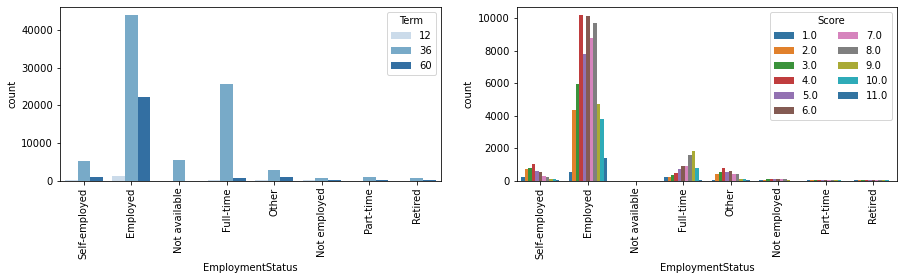

In [51]:
fig= plt.figure(figsize=[15,30])
ax1=plt.subplot(8,2,1)
sns.countplot(data = sub_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=90)
ax2=plt.subplot(8,2,2)
sns.countplot(data = sub_df, x = 'EmploymentStatus', hue = 'ProsperScore',palette='tab10')
plt.xticks(rotation=90)
ax2.legend(loc = 1, ncol = 2,title='Score')

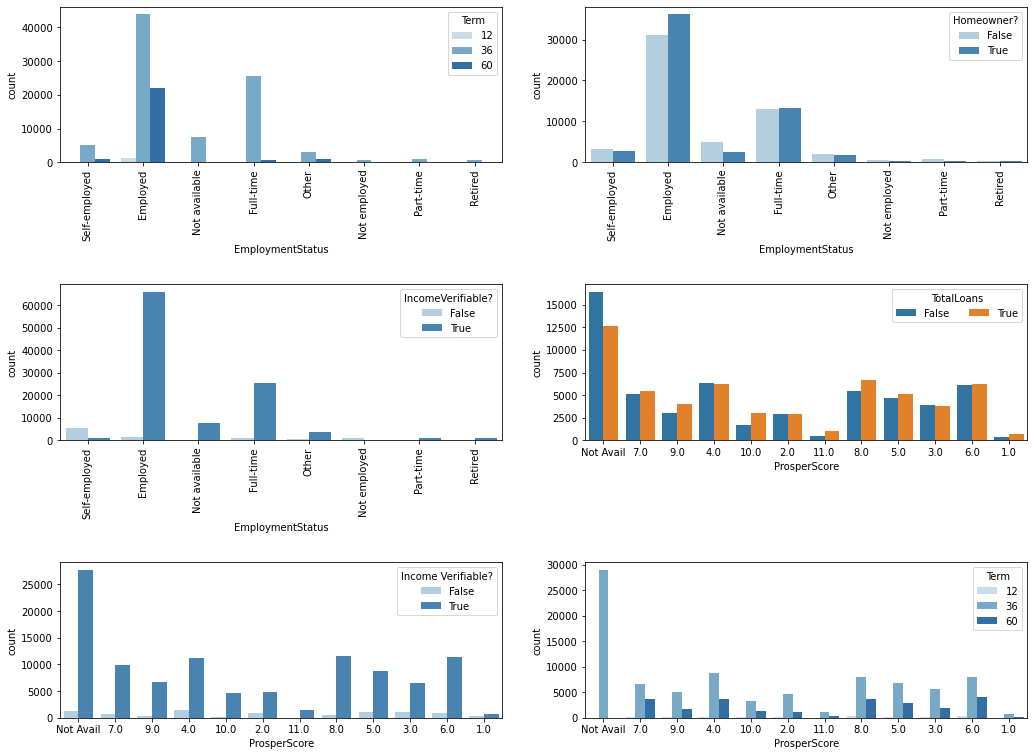

In [52]:
fig= plt.figure(figsize=[15,30])
ax1=plt.subplot(8,2,1)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=90)

ax2=plt.subplot(8,2,2)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner',palette='Blues')
plt.xticks(rotation=90)
ax2.legend(title="Homeowner?")

ax3=plt.subplot(8,2,3)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'IncomeVerifiable',palette='Blues')
plt.xticks(rotation=90)
ax3.legend(title="IncomeVerifiable?",loc=1)

ax4=plt.subplot(8,2,4)
sns.countplot(data = loan_df, x = 'ProsperScore', hue = 'IsBorrowerHomeowner',palette='tab10')
plt.xticks(rotation=90)
ax4.legend(title="TotalLoans",loc=1,ncol=2)

ax5=plt.subplot(8,2,5)
sns.countplot(data = loan_df, x = 'ProsperScore', hue = 'IncomeVerifiable',palette='Blues')
plt.xticks(rotation=90)
ax5.legend(title="Income Verifiable?")

ax6=plt.subplot(8,2,6)
sns.countplot(data = loan_df, x = 'ProsperScore', hue = 'Term',palette='Blues')
plt.xticks(rotation=90)
fig.tight_layout(pad=3.0);

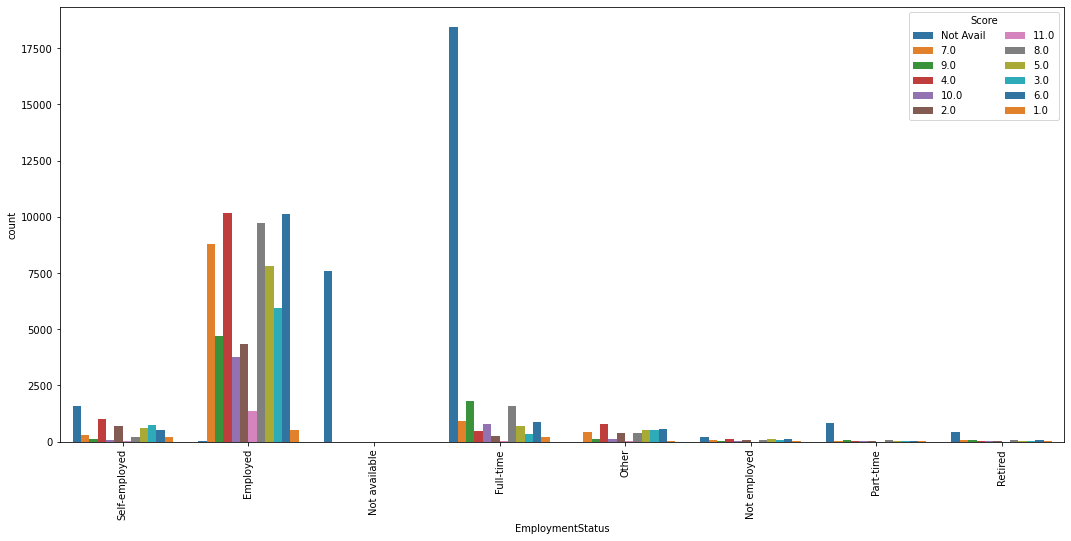

In [53]:
plt.figure(figsize=(18, 8))
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'ProsperScore',palette='tab10')
plt.xticks(rotation=90)
plt.legend(loc = 1, ncol = 2,title='Score');

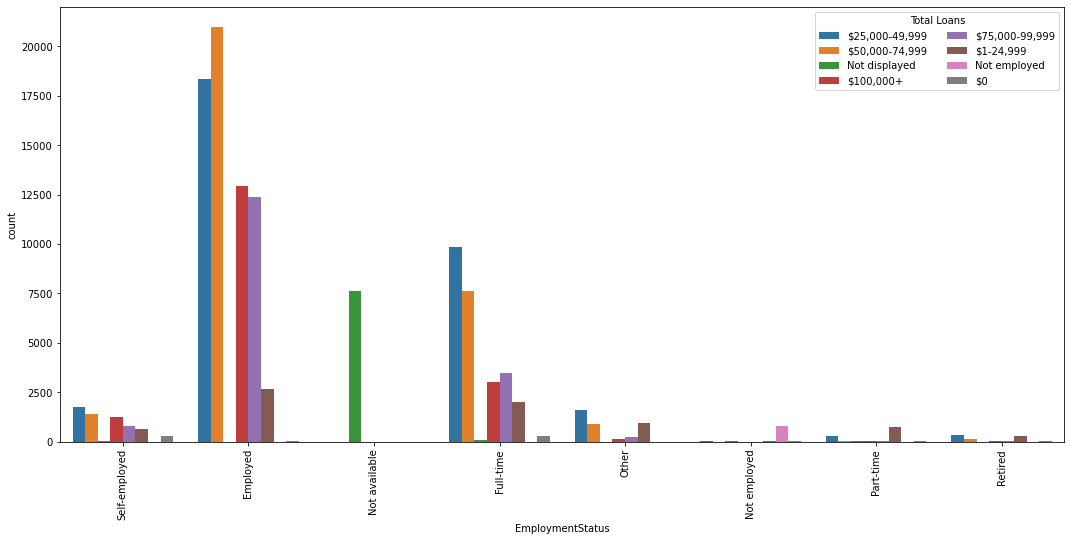

In [54]:
plt.figure(figsize=(18, 8))
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'IncomeRange',palette='tab10')
plt.xticks(rotation=90)
plt.legend(loc = 1, ncol = 2,title='Total Loans');

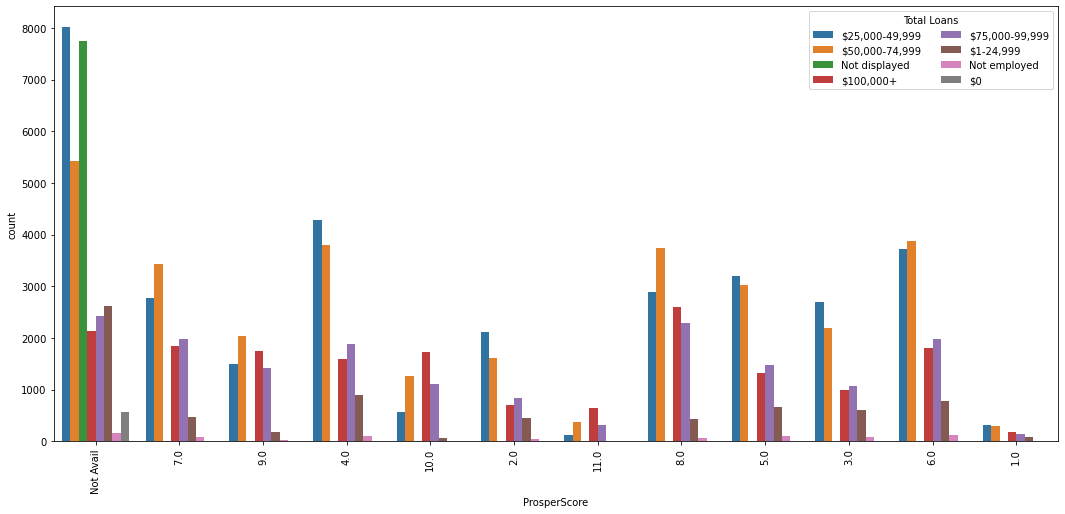

In [55]:
plt.figure(figsize=(18, 8))
sns.countplot(data = loan_df, x = 'ProsperScore', hue = 'IncomeRange',palette='tab10')
plt.xticks(rotation=90)
plt.legend(loc = 1, ncol = 2,title='Total Loans');

- The figure above demonstrates that there is insufficient information on the employment status variable for part-time, retired, and not employed borrowers to demonstrate how it interacts with term and other variables. However, it is clear that there is a relationship between homeownership and prosper score. We can see that there is interaction between term and Prosper score since the majority of borrowers with high scores are homeowners. It also appears vital to take high scores, particularly for borrowers with more than four incomes. There are more 60-month loans on scores higher than 4 relative to all other scores.

In [57]:
loan_df.LoanOriginalAmount.isnull().sum()

0

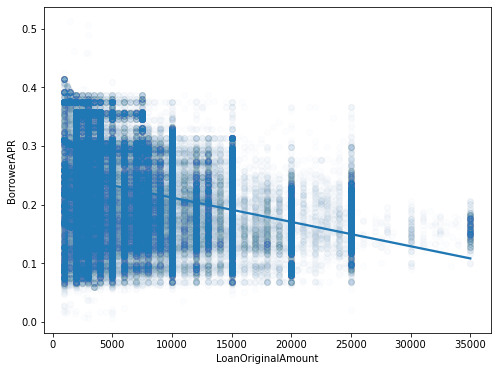

In [56]:
plt.figure(figsize=(8, 6))
sns.regplot(data=loan_df, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 0.01});

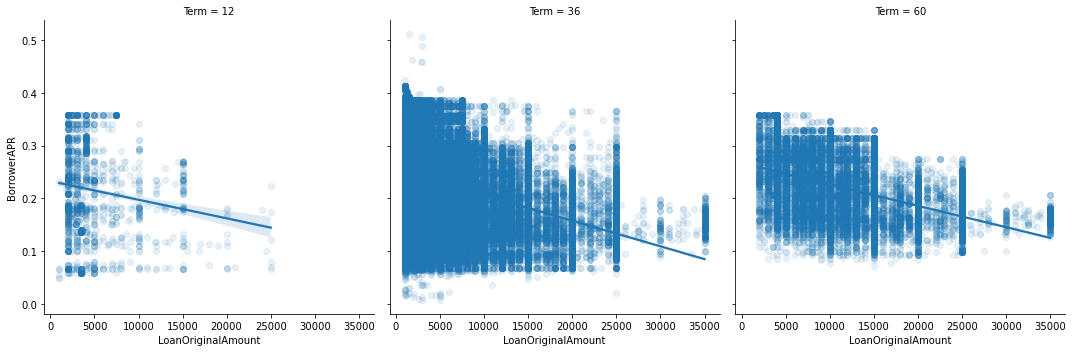

In [58]:
# Show the effect of Term on BorrowerAPR and amount
g = sns.FacetGrid(data=loan_df, aspect=1, col='Term', height=5, col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha': 0.1})
g.add_legend();

- The relationship between the loan amount and BorrowerAPR appears to be unaffected by the loan Term.

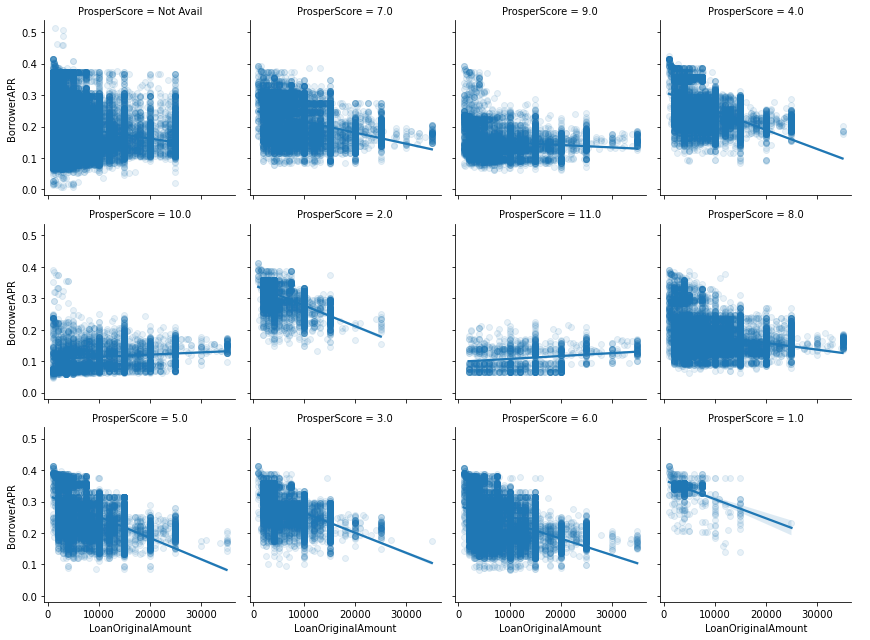

In [59]:
# Show the effect of Prosper score on BorrowerAPR and amount
g = sns.FacetGrid(data=loan_df, aspect=1, col='ProsperScore', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha': 0.1})
g.add_legend();

- A higher score raises the loan amount. A higher score lowers the borrower APR. It's interesting to note that as the Prosper score rises from 0 to 10, the link between the borrower APR and loan amount shifts from being negatively to marginally positively. Because persons with scores between 6 and 10 tend to borrow more money, raising the APR could stop them from borrowing any further and maximize the profit. However, those with lower lower scores tend to borrow less money, thus a reduced APR can persuade them to do so.

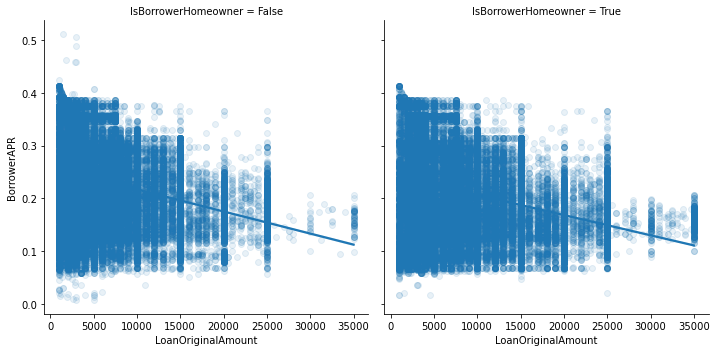

In [60]:
g = sns.FacetGrid(data=loan_df, aspect=1, height=5, col='IsBorrowerHomeowner', col_wrap=2)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha': 0.1})
g.add_legend();

- The relationship between the loan amount and BorrowerAPR appears to be unaffected by the Homeowner variable.

In [46]:
sub_df['ListingCategory (numeric)'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
      ...  
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), Length: 21, dtype: int64

In [ ]:
loan_df.info()

- As this project is all about visualization, for simplicity purpose I am going to delete all the null rows from the above data

In [ ]:
loan_df = loan_df.dropna()
loan_df.describe()

In [ ]:
loan_df.head()

In [65]:
#convert term into category
loan_df['Term'] = loan_df['Term'].astype('category')

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_65529/2271018291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['Term'] = loan_df['Term'].astype('category')


In [64]:
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


- The above data obtained is a final dataset, with no NULL values and this is my final working dataset.(TIDY dataset)

### Identify the type of variables

In [ ]:
loan_df.dtypes

In [ ]:
#Numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

In [ ]:
#Categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category')]
cat_loan_df.columns

### What is the structure of this dataset?
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

For simplicity of the visualization I have looked at only few variables as the project objective itself says to focus on only few variables.

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the Loan outcome in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that loan status will have huge impact with the background of the borrower like occupation, income , whether he is with homeown status and prosper rating.

## Univariate Exploration

### Categorical attributes only

In [61]:
loan_df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [62]:
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [66]:
loan_df['ProsperRating_Alpha'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating_Alpha, dtype: int64

/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_65529/871944170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
/var/folders/_h/67ytyncn46l3vcwj8pgsbb0w0000gn/T/ipykernel_65529/871944170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)


<Figure size 720x360 with 0 Axes>

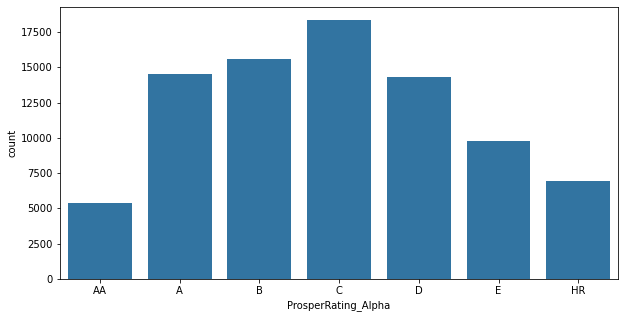

In [67]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);


**ListingCategory:** (Nominal Variable)

- The category of the listing that the borrower selected when posting their listing:
    
    0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [ ]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
sns.countplot(data = loan_df, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_df['ListingCategory_Numeric'].value_counts().index );


In [68]:
loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

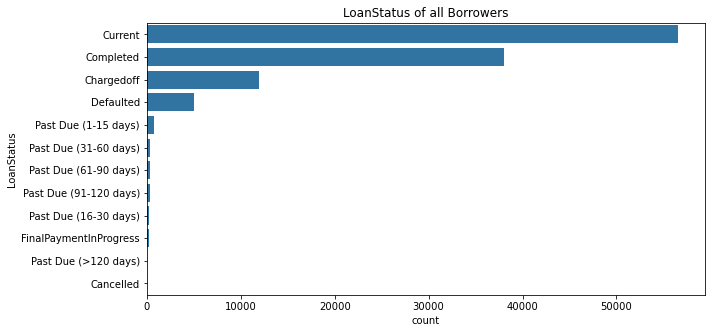

In [69]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sns.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);


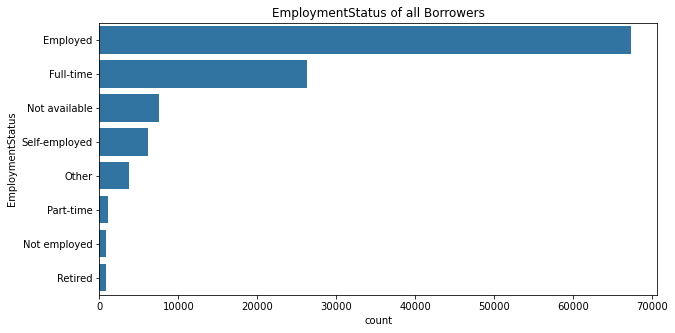

In [70]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sns.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

In [71]:
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
Name: IncomeRange, dtype: int64

In [74]:
loan_df_1 = loan_df[loan_df['EmploymentStatus'] != 'Not employed']

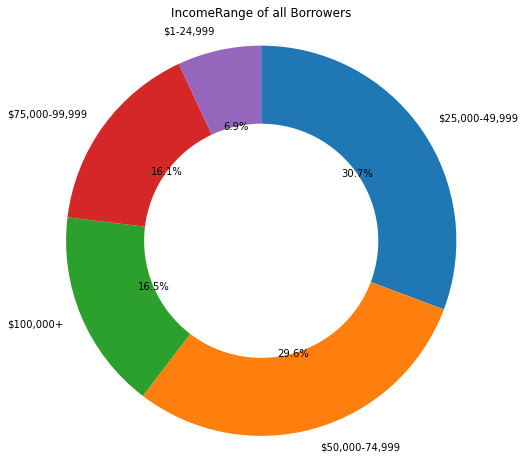

In [75]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

In [ ]:
loan_df['BorrowerState'].value_counts().head(10)

In [ ]:
# BorrowerState
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'BorrowerState', color = base_color,
             order = loan_df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

In [ ]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

In [ ]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'ProsperScore', color = base_color);
plt.title("ProsperScore of all Borrowers");

### Insights with categorical variables analysis
- Loans with **"AA"** category are with lesser count


- The top 2 loan consideration reasons are **1 - Debt Consolidation, 2 - Home Improvement**


- LoanStatus of all Borrowers are with **current** and **completed** state


- EmploymentStatus of all Borrowers are with **Employed** State


- Top IncomeRange of all Borrowers are within **$50,000-74,999**


- Top 2 states of all Borrowers are from **CA** and **NY**


- Majority of the borrowers are with an occupation of **Professional** and **Executive**


- Majority of the borrowers are with a rating or score from **4 to 8**

### Now Let us Analyze the numeric attributes
- The variables that are numeric are 'Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded', 'Investors'

In [ ]:
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

In [ ]:
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");

In [ ]:
plt.hist(data = loan_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [ ]:
(loan_df['StatedMonthlyIncome'].describe())

In [ ]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

In [ ]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");



# Without log transformation looks good on StatedMonthlyIncome

In [ ]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount');

In [ ]:
(loan_df['LoanOriginalAmount'].describe())

In [ ]:
np.log10(loan_df['LoanOriginalAmount'].describe())

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])


In [ ]:
plt.hist(data = loan_df, x = 'PercentFunded');

In [ ]:
loan_df['Investors'].min(), loan_df['Investors'].max(),

In [ ]:
plt.hist(data = loan_df, x = 'Investors');

In [ ]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

## Insights with Numerical variables analysis
- **BorrowerRate:** The Borrower's interest rate for this loan. The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.

- **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

- **LoanOriginalAmount:** The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

- **Investors:** Majority of the investors are between 0 and 100

## Bivariate Exploration

### Relationship between two numeric variables

In [ ]:
loan_df.dtypes

In [ ]:
loan_df.columns

In [ ]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']


In [ ]:
# correlation plot
plt.figure(figsize = [12, 8])
sns.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Relationship between numeric & categorical variables

In [ ]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(loan_df.shape[0], 2000, replace = False)
loan_df_samp = loan_df.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_df_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();


In [ ]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

### Categorical variables analysis

In [ ]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sns.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

### Insights about the entire Bivariate analysis

- Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.


- Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees


- The range of the salaries stated is higher for employed borrowers.


- LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount


- LoanStatus with current and completed have own homes when they applied for loans


- Majority of the loan applicants are from 50K to 75K range with emloyeed status


- Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C

### Multivariate Exploration

In [ ]:
g = sns.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');


In [ ]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

In [ ]:
plt.figure(figsize = [15, 7])

ax = sns.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

### Does rating depend on the monhtly income and Employment status?

In [ ]:
plt.figure(figsize = [15, 7])
ax = sns.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

In [ ]:
plt.figure(figsize = [15, 7])
ax = sns.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

In [ ]:
plt.figure(figsize = [15, 7])
ax = sns.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

### Insights from the multivariate exploration data

- For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary


- Employed and full time employees have their mean salaries in higher range


- Majority of the borrowers are falling under prosper rating of B , irrespective of the income range


- The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B


- We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates


- To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.

# <p style="text-align: center;">The End!</p>